In [36]:
import os
import IPython

from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import librosa
import librosa.display

# import functions from scripts directory
import sys
sys.path.insert(1, '../../scripts/') # caution: path[0] is reserved for script path (or '' in REPL)
from read_wav import _read_wav_

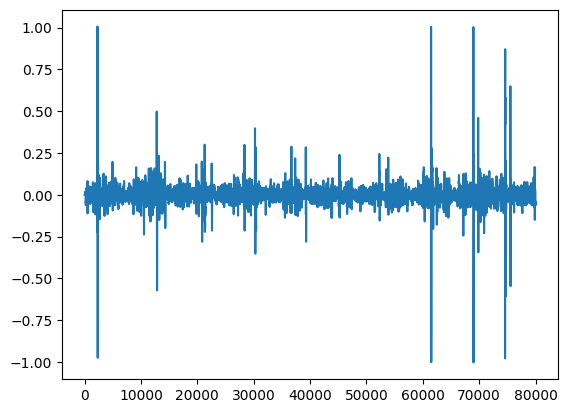

In [37]:
vec, tar_sr = _read_wav_("156_5b3_Pl_mc_AKGC417L.wav")
plt.plot(vec)

In [5]:
from librosa.feature import melspectrogram

#### Mel-Log

In [8]:
# input tar_sr, vec, fmax: tar_sr/2, 
# passing through arguments to the Mel filters

def mel_log(vec, sr):
    mel = melspectrogram(y=vec, sr=sr, n_fft=512, fmax=None, n_mels=50)
    mel_dB = librosa.power_to_db(mel, ref=np.max)

    return mel_dB
    
mel_dB = mel_log(vec, tar_sr)
# mel_dB.absolute()


In [18]:
zscore

0.0

In [31]:
def array2D_to_rgb(array, eps=1e-6):
    array = np.stack([array, array, array], axis=1)
    # Standardize
    mean = array.mean()
    std = array.std()
    array = (array - mean) / (std + eps)

    # Normalize to [0, 255]
    _min, _max = array.min(), array.max()

    if (_max - _min) > eps:
        V = np.clip(array, _min, _max)
        V = 255 * (V - _min) / (_max - _min)
        V = V.astype(np.uint8)
    else:
        V = np.zeros_like(array, dtype=np.uint8)

    return V

mel_dB_rgb = array2D_to_rgb(mel_dB)

mel_dB_rgb.shape

# from scipy import stats
# mel_db_rgb_norm = stats.zscore(mel_dB_rgb, axis=1)

# mel_db_rgb_norm



(50, 3, 157)

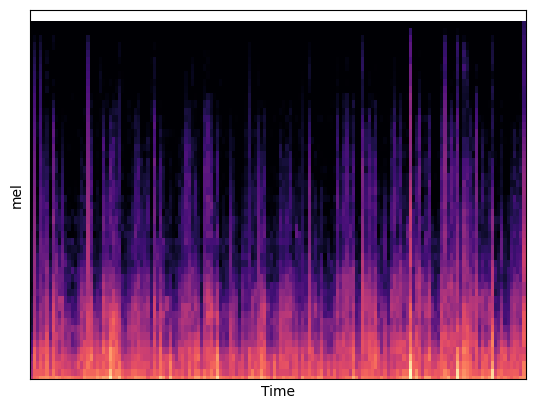

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mel_dB,
                         sr=tar_sr,
                         fmax=tar_sr/2,
                         ax=ax)

plt.xlabel('Time')
plt.ylabel('mel')
plt.ylim((0,51))
plt.show()

#### ALSC task: Normalization to Zero Mean

#### RDC Task

In [ ]:
# convert RGB color


# Enlarge the image to twice the size using linear interpolation



In [ ]:
# save file


In [ ]:
# Duplicate into three channels RGB, the shape for feeding the ResNet model


In [ ]:
# RDC tasks: linear interpolation enlarge twice


#### Enlarge

# enlarge using linear interpolation



#### seperate to three layer

# Viz

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

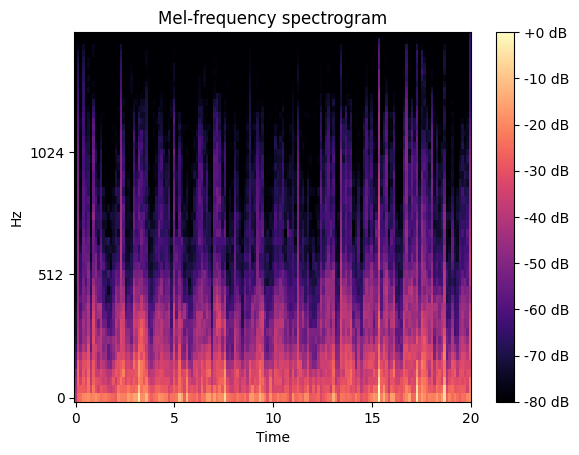

In [9]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mel_dB, x_axis='time',
                         y_axis='mel', sr=tar_sr,
                         fmax=tar_sr/2, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')